In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

- Supervisionado: temos a resposta se cada passageiro foi morto ou não
- Classificação: vamos classificar em dois grupos: os que sobreviveram e os que não sobreviveram

In [185]:
data = pd.read_csv("tested.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [197]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
Quantidade de mulheres que sobreviveram: 152
Quantidade de homens que sobreviveram: 0
Quantidade de mulheres que sobreviveram: 0
Quantidade de homens que sobreviveram: 266


In [198]:
data = data.drop(['Name','Cabin'], axis=1)

In [199]:
media_idade_masc = int(data[data['Sex'] == 'male']['Age'].mean())
media_idade_femin = int(data[data['Sex'] == 'female']['Age'].mean())

data['Age'] = np.where(
        pd.isna(data['Age']) & (data['Sex'] == "male"),
        media_idade_masc,
    np.where(pd.isna(data['Age']) & (data['Sex'] == "female"),
             media_idade_femin,
             data['Age']
             )
)

In [200]:
data = data.dropna()

In [201]:
print(data['Embarked'].value_counts())
print(data['Ticket'].nunique())

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64
362


In [202]:
data = data.drop(['Ticket'], axis=1)
data['Embarked'] = data['Embarked'].replace({
    'S':1,
    'C':2,
    'Q':3
}).astype(int)
data['Sex'] = data['Sex'].replace({
    'male':1,
    'female':2,
}).astype(int)

C:\Users\iamsa\AppData\Local\Temp\ipykernel_18648\2778138781.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Embarked'] = data['Embarked'].replace({
C:\Users\iamsa\AppData\Local\Temp\ipykernel_18648\2778138781.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({


In [203]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Sex          417 non-null    int64  
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     417 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 32.6 KB


<Axes: >

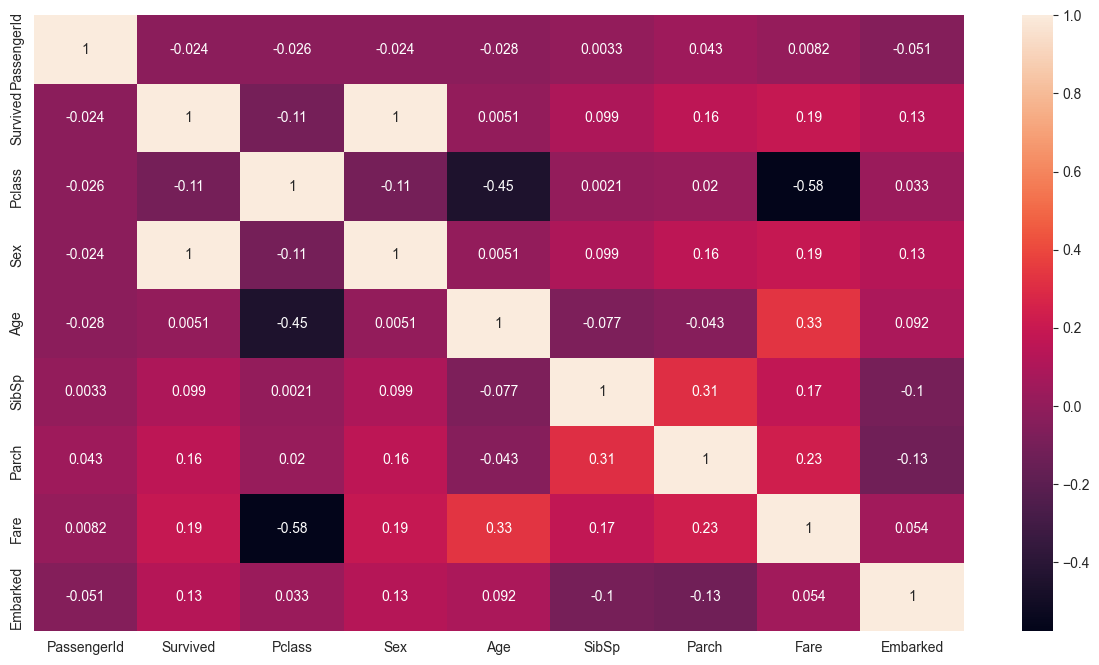

In [204]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(numeric_only=True), annot=True)

In [205]:
print(data['Survived'].value_counts())
print("Quantidade de mulheres que sobreviveram:",len(data[(data['Survived'] == 1) & (data['Sex'] == 2)]))
print("Quantidade de homens que sobreviveram:",len(data[(data['Survived'] == 1) & (data['Sex'] == 1)]))

Survived
0    265
1    152
Name: count, dtype: int64
Quantidade de mulheres que sobreviveram: 152
Quantidade de homens que sobreviveram: 0


In [208]:
from sklearn.model_selection import train_test_split

X = data.drop(['Survived'], axis = 1)
y = data['Survived']

In [209]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

* Métodos de classificação que serão usados:
    - DecisionTreeClassifier
    - RandomForestClassifier
    - LogisticRegression
    - svm
    - KNeighborsClassifier

In [212]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [215]:
clf.score(X_test, y_test)

1.0

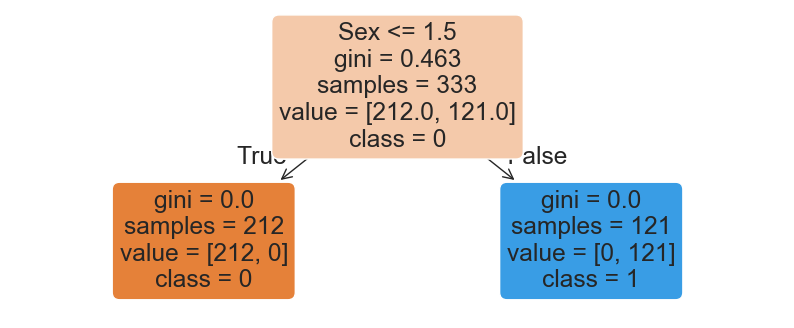

In [228]:
plt.figure(figsize=(10,4))
tree.plot_tree(clf,
               feature_names = X_train.columns,
               class_names=list(map(str, clf.classes_)),
               filled=True,
               rounded=True)
plt.show()

       Feature  Importance
2          Sex         1.0
0  PassengerId         0.0
1       Pclass         0.0
3          Age         0.0
4        SibSp         0.0
5        Parch         0.0
6         Fare         0.0
7     Embarked         0.0


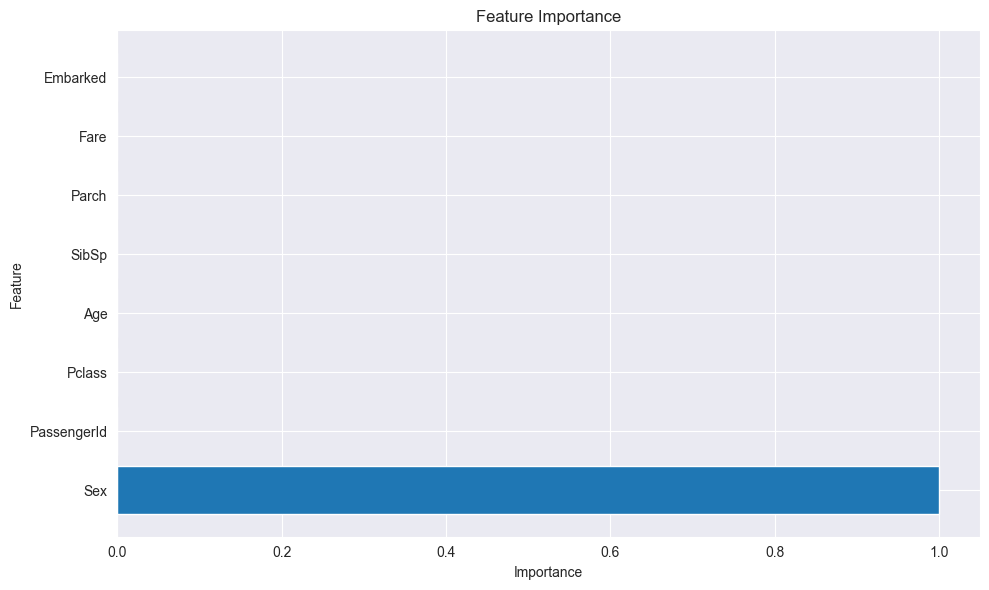

In [229]:
importances = clf.feature_importances_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"feature {i}" for i in range(X_train.shape[1])]

# Criar DataFrame para visualização mais fácil
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print(feature_importance_df)

# Visualizar graficamente
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()